# **Import Libraries and modules**

In [0]:
# https://keras.io/
# importing all the necessary modules 
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


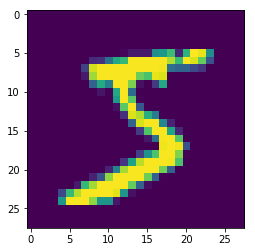

In [35]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [38]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [40]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

##### keras.layers has all the necessary functions for Neural network layers such as Conv2D,BatchNormalization,dense,Dropout etc

In [0]:
from keras.layers import *

In [0]:
def conv_bn_dropout(model,size,no):
  
  model.add(Convolution2D(size, 3, 3, activation='relu',use_bias=False))
  model.add(BatchNormalization(axis=-1))
  model.add(Dropout(no))
  return model

'''each block is a list of lists containing output channels After Conv or the no 
of kernels of size 3*3*prev_size*block[0] and block[1] contains the dropout value'''

block1=[[16,0.1],[16,0.2],[32,0]]
block2=[[16,0.1],[16,0.15]]


In [43]:
model=Sequential()
model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1)))

for i in block1:
  model=conv_bn_dropout(model,i[0],i[1])
  
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(16, 1, 1, activation='relu'))

for i in block2:
  model=conv_bn_dropout(model,i[0],i[1])
model.add(Convolution2D(16, 3, 3, use_bias=False))

model.add(Convolution2D(10, 4, 4, use_bias=False))
model.add(Flatten())
model.add(Activation('softmax'))
  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", use_bias=False)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", use_bias=False)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (1, 1), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the

In [44]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 24, 24, 16)        1152      
_________________________________________________________________
batch_normalization_6 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_6 (Dropout)          (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 22, 22, 16)        2304      
_________________________________________________________________
batch_normalization_7 (Batch (None, 22, 22, 16)        64        
_________________________________________________________________
dropout_7 (Dropout)          (None, 22, 22, 16)        0         
__________

In [0]:
#ModelCheckpoint is used for checkpointing the models
#Here I am checkpointing the best acc weights till then

from keras.callbacks import ModelCheckpoint

In [ ]:
#Using Stochastic gradient descent optimizer ,putting lr as 0.1 for faster convergence

In [0]:
sgd=keras.optimizers.SGD(lr=0.1, momentum=0.0, decay=0.0, nesterov=False)

In [ ]:
#model compiling

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer=sgd,
             metrics=['accuracy'])
filepath="Best_weights.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [49]:
model.fit(X_train, Y_train,validation_data=(X_test,Y_test), batch_size=64, nb_epoch=10, verbose=1,callbacks=callbacks_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 178us/step - loss: 0.1520 - acc: 0.9535 - val_loss: 0.0519 - val_acc: 0.9829

Epoch 00001: val_acc improved from -inf to 0.98290, saving model to Best_weights.hdf5
Epoch 2/10
60000/60000 [==============================] - 9s 157us/step - loss: 0.0655 - acc: 0.9798 - val_loss: 0.0385 - val_acc: 0.9879

Epoch 00002: val_acc improved from 0.98290 to 0.98790, saving model to Best_weights.hdf5
Epoch 3/10
60000/60000 [==============================] - 9s 153us/step - loss: 0.0522 - acc: 0.9844 - val_loss: 0.0328 - val_acc: 0.9887

Epoch 00003: val_acc improved from 0.98790 to 0.98870, saving model to Best_weights.hdf5
Epoch 4/10
60000/60000 [==============================] - 9s 154us/step - loss: 0.0449 - acc: 0.9855 - val_loss: 0.0517 - val_acc: 0.9838

Epoch 00004: val_acc did not improve from 0.98870
Epoch 5/10
60000/60000 [==============================] - 9s 153us/step - loss:

In [50]:
model.fit(X_train, Y_train,validation_data=(X_test,Y_test), batch_size=128, nb_epoch=10, verbose=1,callbacks=callbacks_list)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 1152/60000 [..............................] - ETA: 7s - loss: 0.0168 - acc: 0.9922

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 6s 93us/step - loss: 0.0221 - acc: 0.9930 - val_loss: 0.0225 - val_acc: 0.9929

Epoch 00001: val_acc improved from 0.99230 to 0.99290, saving model to Best_weights.hdf5
Epoch 2/10
60000/60000 [==============================] - 6s 92us/step - loss: 0.0219 - acc: 0.9929 - val_loss: 0.0215 - val_acc: 0.9928

Epoch 00002: val_acc did not improve from 0.99290
Epoch 3/10
60000/60000 [==============================] - 6s 92us/step - loss: 0.0199 - acc: 0.9937 - val_loss: 0.0209 - val_acc: 0.9932

Epoch 00003: val_acc improved from 0.99290 to 0.99320, saving model to Best_weights.hdf5
Epoch 4/10
60000/60000 [==============================] - 6s 92us/step - loss: 0.0190 - acc: 0.9939 - val_loss: 0.0206 - val_acc: 0.9937

Epoch 00004: val_acc improved from 0.99320 to 0.99370, saving model to Best_weights.hdf5
Epoch 5/10
60000/60000 [==============================] - 6s 92us/step - loss: 0.0194 - acc: 0.9942 - val_loss: 0.0215 - val_acc: 0.9934

Epoc

In [0]:
from keras import backend as K
K.set_value(sgd.lr, 0.01)


In [ ]:
#Decreasing the lr and then again training

In [55]:
model.fit(X_train, Y_train,validation_data=(X_test,Y_test), batch_size=64, nb_epoch=100, verbose=1,callbacks=callbacks_list)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
 1024/60000 [..............................] - ETA: 10s - loss: 0.0066 - acc: 0.9980

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 9s 152us/step - loss: 0.0110 - acc: 0.9963 - val_loss: 0.0210 - val_acc: 0.9935

Epoch 00001: val_acc did not improve from 0.99460
Epoch 2/100
60000/60000 [==============================] - 9s 151us/step - loss: 0.0114 - acc: 0.9961 - val_loss: 0.0205 - val_acc: 0.9943

Epoch 00002: val_acc did not improve from 0.99460
Epoch 3/100
33856/60000 [===============>..............] - ETA: 3s - loss: 0.0102 - acc: 0.9964

KeyboardInterrupt: ignored

In [0]:
#Load the model and print accuracy
from keras.models import load_model


In [0]:
model1=load_model("Best_weights.hdf5")
score = model.evaluate(X_test, Y_test, verbose=0)
score1=model1.evaluate(X_test, Y_test, verbose=0)

In [60]:
print(score)

[0.020109959105318556, 0.994]


In [61]:
print(score1)

[0.0199055839520428, 0.9946]


In [ ]:
#Visualizing the filters 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

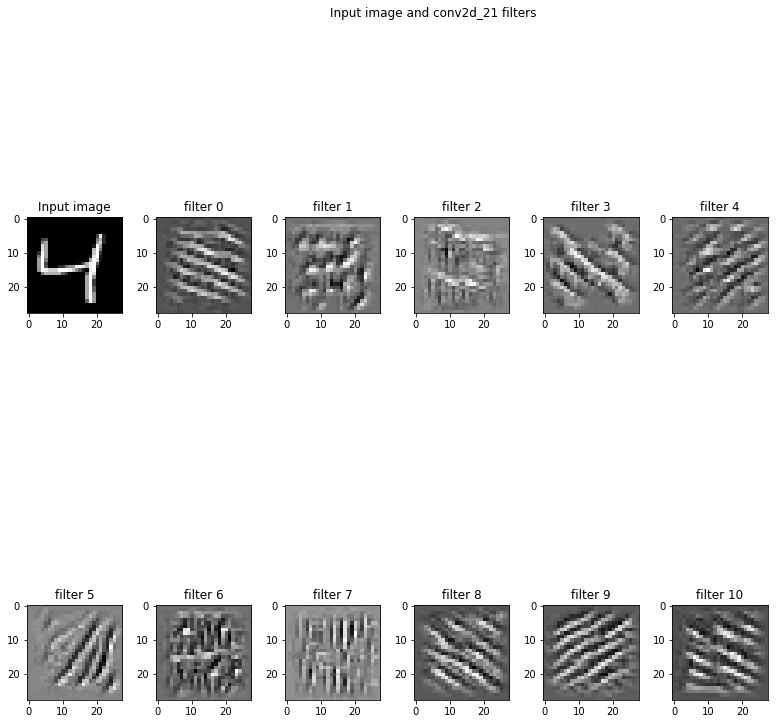

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_21'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()